In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
data = pd.read_csv("Salaries.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


/home/bhagyesh/miniconda3/envs/General/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data = data.drop(["Id", "Notes", "Status", "Agency"], axis = 1)
data = data.dropna()
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128809,220909,13126.3,44430.1,362844.66,407274.78,2012
36160,Gregory Suhr,Chief of Police,302578,0,18974.1,69810.2,321552.11,391362.30,2012
36161,Khoa Trinh,Electronic Maintenance Tech,111921,146415,78057.4,53102.3,336393.73,389496.02,2012
36162,Joanne Hayes-White,"Chief, Fire Department",296943,0,17816.6,72047.9,314759.60,386807.48,2012
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863,192424,17917.2,44438.2,337204.86,381643.11,2012


In [6]:
columns = ["BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits"]
columns

['BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits']

In [7]:
data = data[data.BasePay != "Not Provided"]
data[columns] = data[columns].astype(np.float32)
data[columns].head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
36159,128808.867188,220909.484375,13126.309570,44430.121094,362844.65625,407274.78125
36160,302578.000000,0.000000,18974.109375,69810.187500,321552.12500,391362.31250
36161,111921.000000,146415.312500,78057.406250,53102.289062,336393.71875,389496.03125
36162,296943.000000,0.000000,17816.589844,72047.882812,314759.59375,386807.46875
36163,126863.187500,192424.484375,17917.179688,44438.250000,337204.87500,381643.12500


In [8]:
# Delete rows which have BasePay <= 0
data.sort_values(by = columns, inplace = True)
data = data[data.BasePay > 0]

# Calculating (BasePay + OvertimePay + OtherPay) and (TotalPay + Benefits)
# SumedTotal = BasePay + OvertimePay + OtherPay
# SumedBenefits = TotalPay + Benefits
data["SumedTotal"] = data["BasePay"] + data["OvertimePay"] + data["OtherPay"]
data["SumedBenefits"] = data["TotalPay"] + data["Benefits"]

# Delete rows where SumedTotal != TotalPay and SumedBenefits != TotalPayBenefits
data = data[data.SumedTotal == data.TotalPay]
data = data[data.SumedBenefits == data.TotalPayBenefits]

data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,SumedTotal,SumedBenefits
148619,Ian V Cameron,IS Program Analyst-Assistant,6.04,0.0,10.05,2.30,16.09,18.389999,2014,16.09,18.389999
148620,India C Sabater,Recreation Leader,15.50,0.0,0.00,0.16,15.50,15.660000,2014,15.50,15.660000
110518,Baltazar J Mata,Public Service Trainee,15.83,0.0,0.00,0.16,15.83,15.990000,2013,15.83,15.990000
110519,Leol Aaron Amador,Public Service Trainee,15.83,0.0,0.00,0.16,15.83,15.990000,2013,15.83,15.990000
110520,Carlos J Hernadez,Public Service Trainee,15.83,0.0,0.00,0.16,15.83,15.990000,2013,15.83,15.990000


In [9]:
# Group by JobTitle to find most likely and unlikely job title
df_Job = data[columns + ["JobTitle"]].groupby(by = ["JobTitle"], as_index = False)
df_Job_NumberOfPeople = df_Job.count()
df_Job_NumberOfPeople["Count"] = df_Job_NumberOfPeople["BasePay"]
df_Job_NumberOfPeople.drop(columns, axis = 1, inplace = True)
df_Job_NumberOfPeople.sort_values(by = "Count", inplace = True)
df_Job_NumberOfPeople.head()

,JobTitle,Count
216,"Commissioner 16.700c, No Pay",1
842,Senior Maintenance Controller,1
1028,Transit Power Cable Splicer,1
144,Building Services Technician,1
536,Legislative Clerk,1


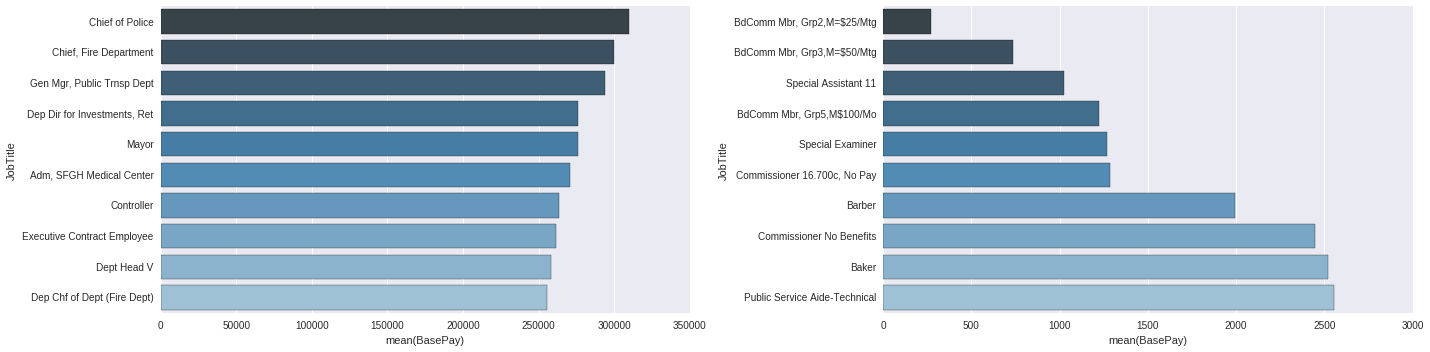

In [10]:
df_Job = df_Job.mean()

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

# 1] 10 job profile with highest BasePay 
# 2] 10 job profile with lowest BasePay
sns.barplot(x = "BasePay", y = "JobTitle", data = df_Job.sort_values(by = "BasePay", ascending = False).head(10), palette="Blues_d", ax = axis1)
sns.barplot(x = "BasePay", y = "JobTitle", data = df_Job.sort_values(by = "BasePay").head(10), palette="Blues_d", ax = axis2)

fig.tight_layout()

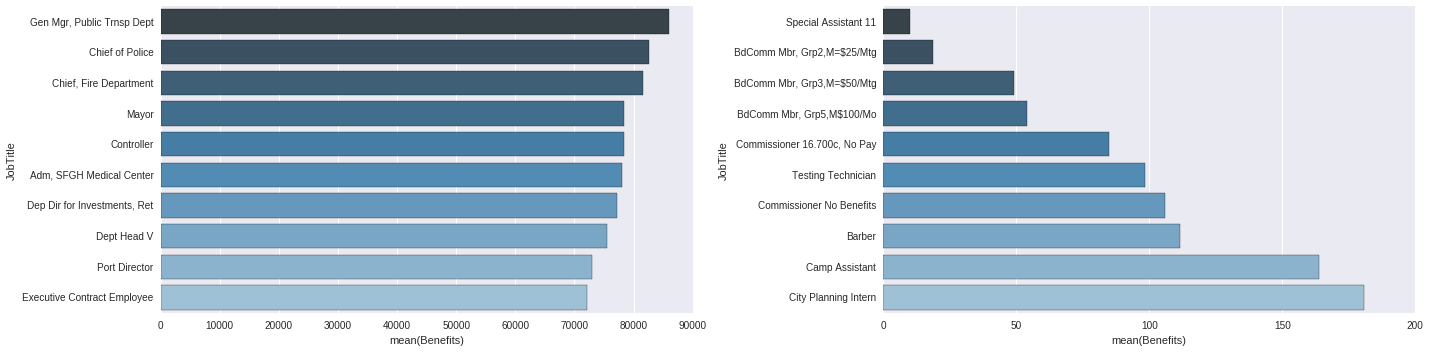

In [11]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

# 1] 10 job profile with highest Benefits
# 2] 10 job profile with lowest Benefits
sns.barplot(x = "Benefits", y = "JobTitle", data = df_Job.sort_values(by = "Benefits", ascending = False).head(10), palette="Blues_d", ax = axis1)
sns.barplot(x = "Benefits", y = "JobTitle", data = df_Job.sort_values(by = "Benefits").head(10), palette="Blues_d", ax = axis2)

fig.tight_layout()

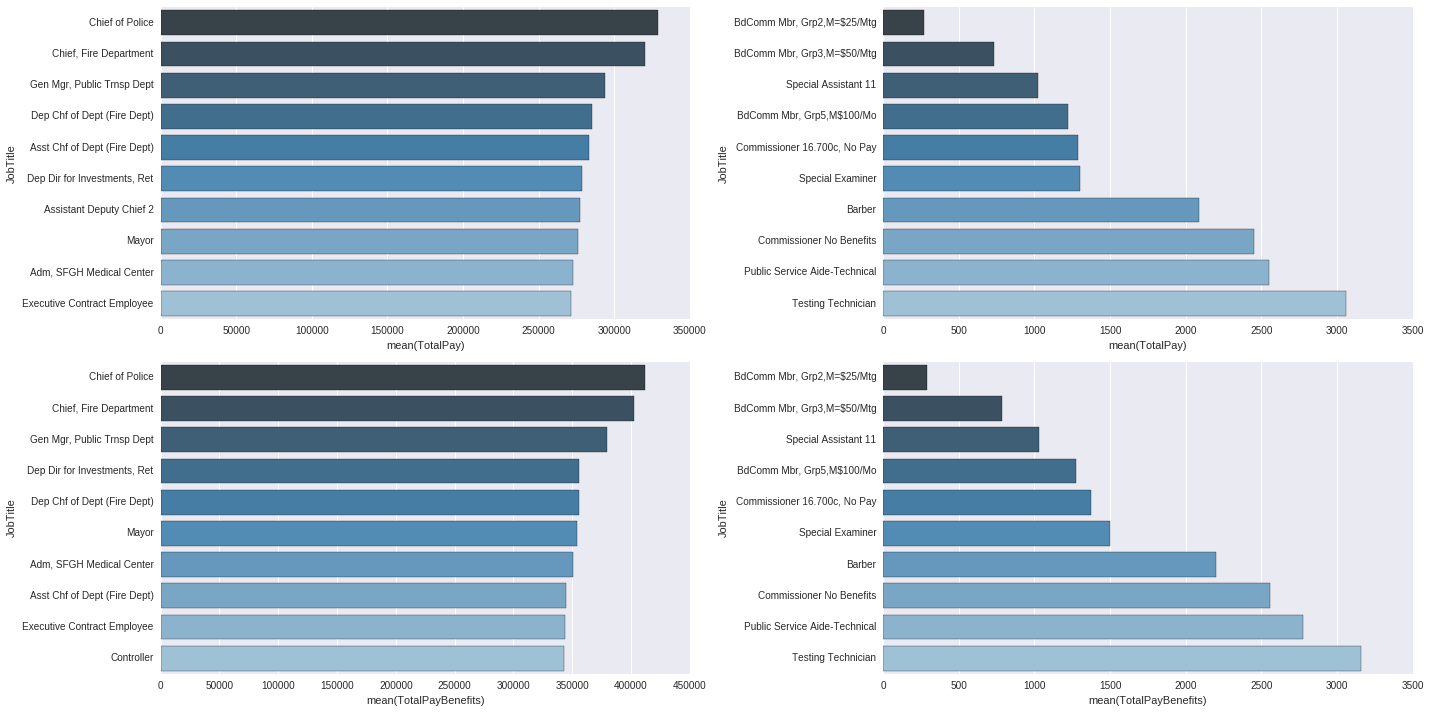

In [12]:
fig, ((axis1,axis2), (axis3,axis4)) = plt.subplots(2,2,figsize=(20,10))

# 1] 10 job profile with highest TotalPay and TotalPayBenefits
# 2] 10 job profile with lowest TotalPay and TotalPayBenefits
sns.barplot(x = "TotalPay", y = "JobTitle", data = df_Job.sort_values(by = "TotalPay", ascending = False).head(10), palette="Blues_d", ax = axis1)
sns.barplot(x = "TotalPay", y = "JobTitle", data = df_Job.sort_values(by = "TotalPay").head(10), palette="Blues_d", ax = axis2)

sns.barplot(x = "TotalPayBenefits", y = "JobTitle", data = df_Job.sort_values(by = "TotalPayBenefits", ascending = False).head(10), palette="Blues_d", ax = axis3)
sns.barplot(x = "TotalPayBenefits", y = "JobTitle", data = df_Job.sort_values(by = "TotalPayBenefits").head(10), palette="Blues_d", ax = axis4)

fig.tight_layout()

In [13]:
df_Year = data.groupby(by = "Year", as_index = False).mean()
df_Year

,Year,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,SumedTotal,SumedBenefits
0,2012,65582.929688,4438.545898,3348.270020,26474.726562,73369.742188,99844.468750,73369.742188,99844.468750
1,2013,68674.351562,4594.976074,3370.081055,23642.878906,76639.406250,100282.289062,76639.406250,100282.289062
2,2014,66815.968750,4738.982422,3058.515625,24711.718750,74613.468750,99325.187500,74613.468750,99325.187500


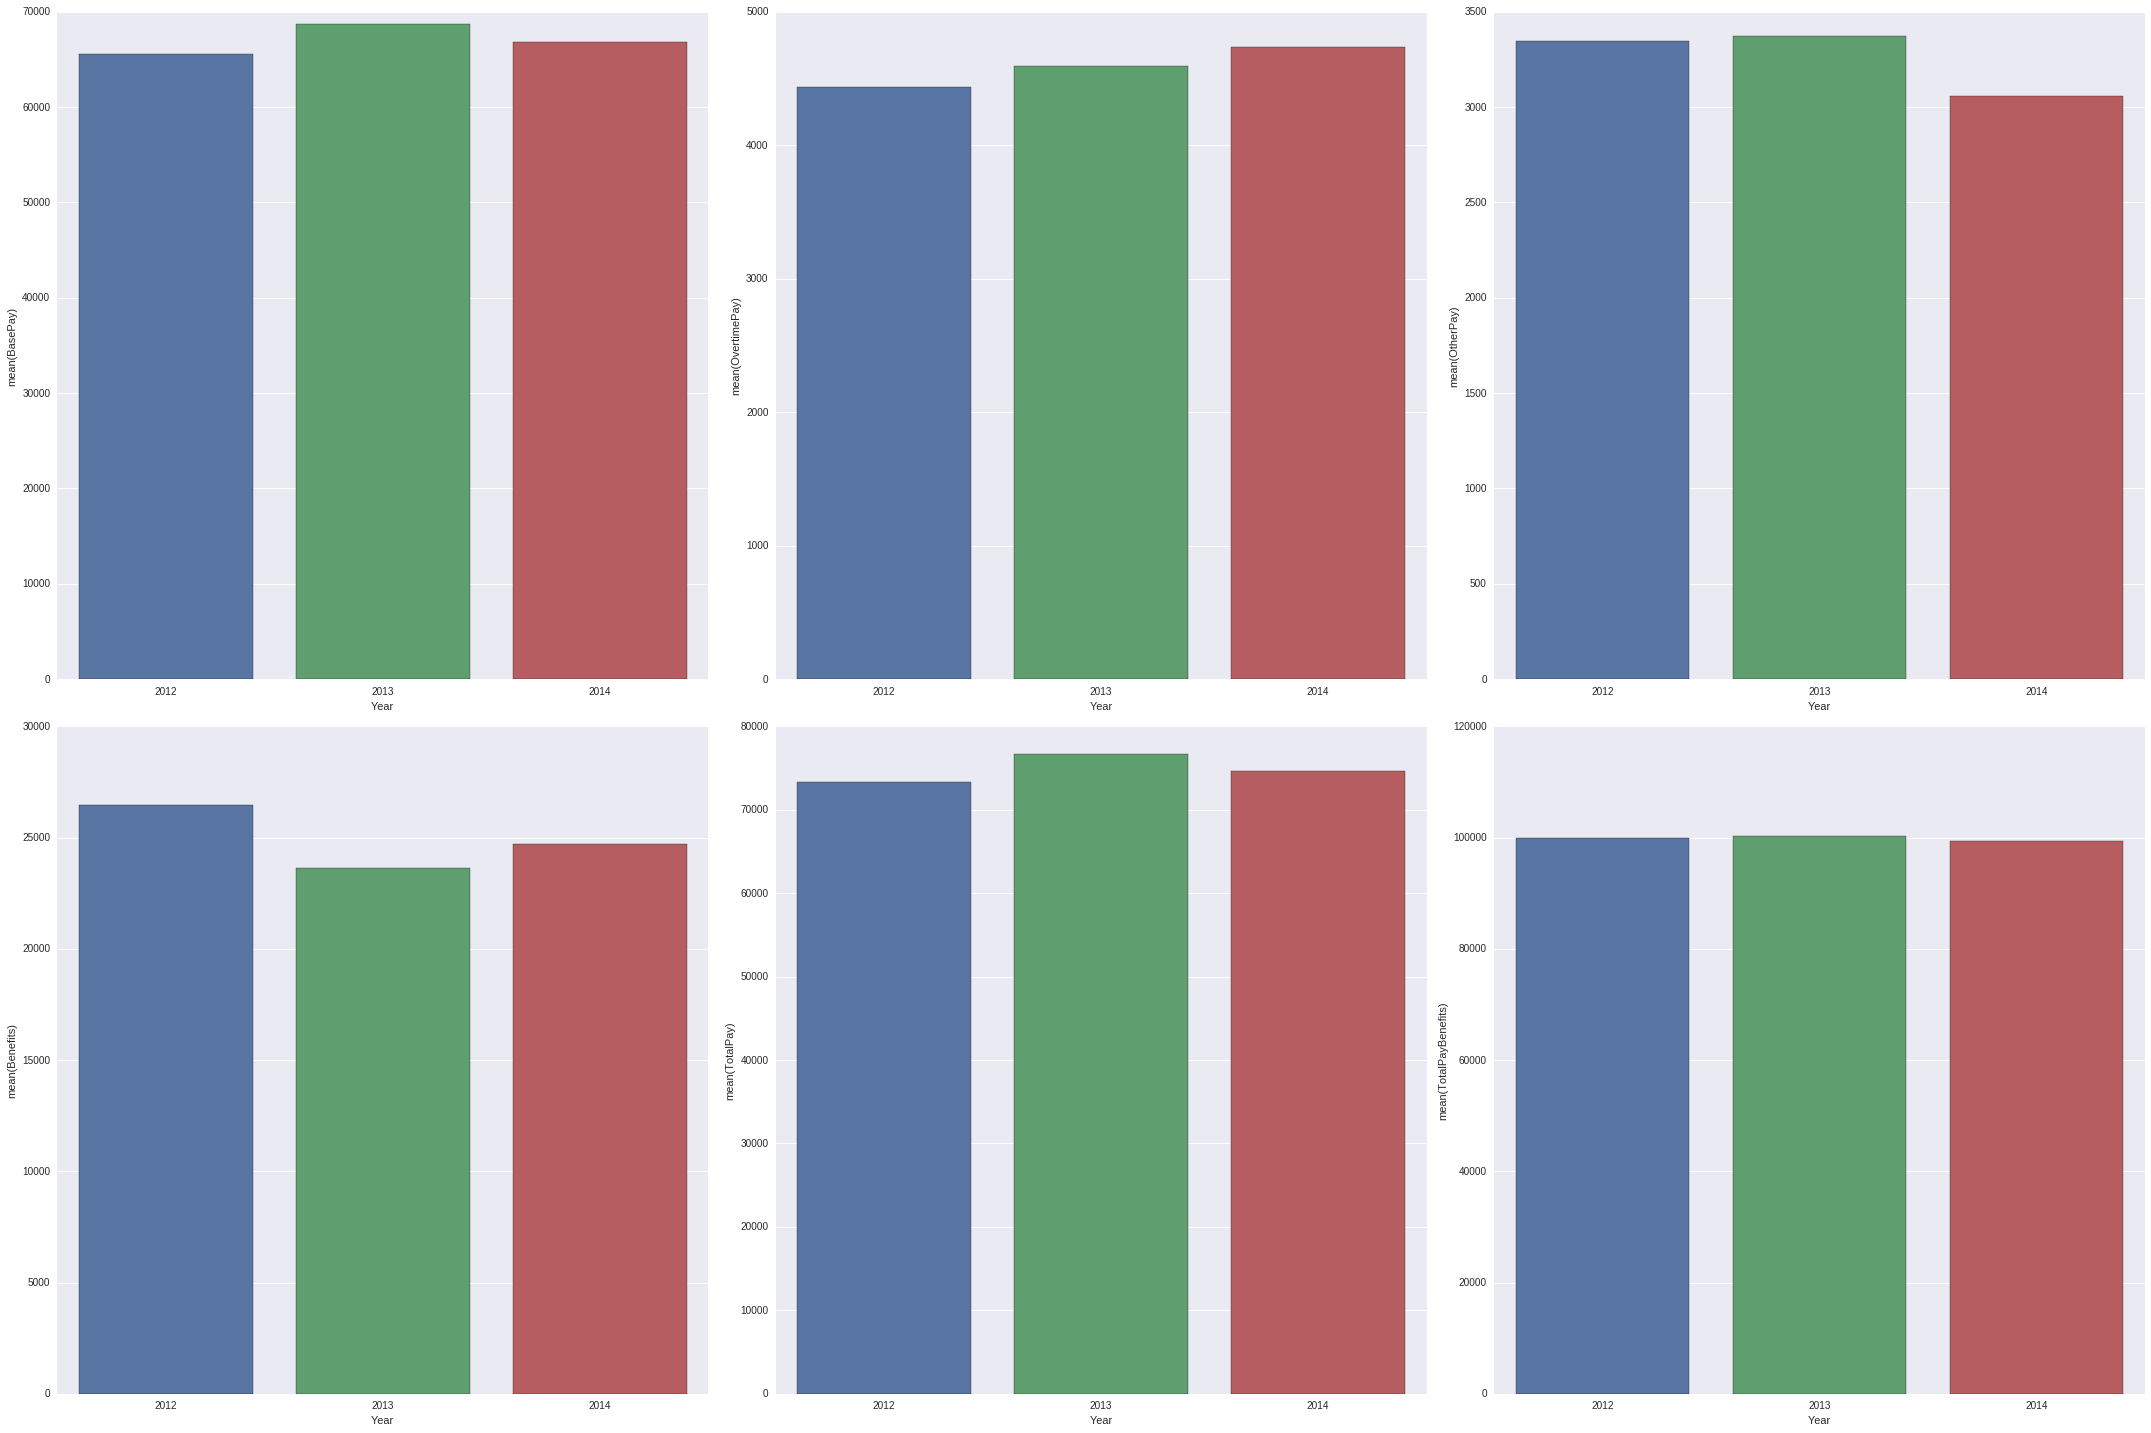

In [14]:
fig, ((axis1, axis2, axis3), (axis4, axis5, axis6)) = plt.subplots(2,3,figsize=(30,20))

# All six pay year wise
sns.barplot(x = "Year", y = "BasePay", data = df_Year, ax = axis1)
sns.barplot(x = "Year", y = "OvertimePay", data = df_Year, ax = axis2)
sns.barplot(x = "Year", y = "OtherPay", data = df_Year, ax = axis3)

sns.barplot(x = "Year", y = "Benefits", data = df_Year, ax = axis4)
sns.barplot(x = "Year", y = "TotalPay", data = df_Year, ax = axis5)
sns.barplot(x = "Year", y = "TotalPayBenefits", data = df_Year, ax = axis6)

fig.tight_layout()

In [15]:
df = data.groupby(by = ["Year", "JobTitle"], as_index = False).mean()
df[df.Year == 2012].min()

Year                                        2012
JobTitle            ASR Senior Office Specialist
BasePay                                      265
OvertimePay                                    0
OtherPay                                       0
Benefits                                 28.2157
TotalPay                                     265
TotalPayBenefits                         293.216
SumedTotal                                   265
SumedBenefits                            293.216
dtype: object